In [ ]:

import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


Available Expiration Dates: ('2025-04-04', '2025-04-11', '2025-04-17', '2025-04-25', '2025-05-02', '2025-05-16', '2025-06-20', '2025-07-18', '2025-08-15', '2025-09-19', '2025-11-21', '2025-12-19', '2026-01-16', '2026-03-20', '2026-06-18', '2026-09-18', '2026-12-18', '2027-01-15', '2027-06-17')
CALL Options:
         contractSymbol             lastTradeDate  strike  lastPrice     bid  \
0  TSLA250404C00100000 2025-03-27 19:18:50+00:00   100.0     178.05  162.80   
1  TSLA250404C00110000 2025-03-28 14:31:38+00:00   110.0     153.50  152.80   
2  TSLA250404C00120000 2025-03-28 19:03:28+00:00   120.0     144.00  142.50   
3  TSLA250404C00130000 2025-03-27 19:54:40+00:00   130.0     143.85  132.55   
4  TSLA250404C00140000 2025-03-27 16:37:29+00:00   140.0     124.46  122.55   

      ask     change  percentChange  volume  openInterest  impliedVolatility  \
0  164.65   0.000000       0.000000    36.0            80           2.914065   
1  154.65 -12.500000      -7.530121     3.0            

In [ ]:
# Mapping Quidditch Teams to Stock Symbols
teams = {
    "Gryffindor": "TSLA",
    "Slytherin": "AAPL",
    "Ravenclaw": "MSFT",
    "Hufflepuff": "AMZN"
}

⚡ Strong Call Attacks:
    strike  lastPrice  openInterest  impliedVolatility
15   200.0      63.60          5822           1.217777
41   270.0       9.30          7226           0.833742
44   280.0       5.70          7726           0.817141
45   285.0       4.44          5769           0.813600
46   290.0       3.40          6978           0.813234
47   295.0       2.58          5032           0.809572
48   300.0       1.96         19584           0.813478
49   305.0       1.48          5033           0.815187
52   320.0       0.67          6900           0.840822
58   350.0       0.18          9727           0.923829
62   370.0       0.08          5908           0.958985
68   400.0       0.03          6980           1.054692
🛡️ Strong Put Defenses:
    strike  lastPrice  openInterest  impliedVolatility
0    100.0       0.02         39592           2.281254
3    130.0       0.06         23197           1.906250
4    140.0       0.08          8618           1.800782
5    150.0       0

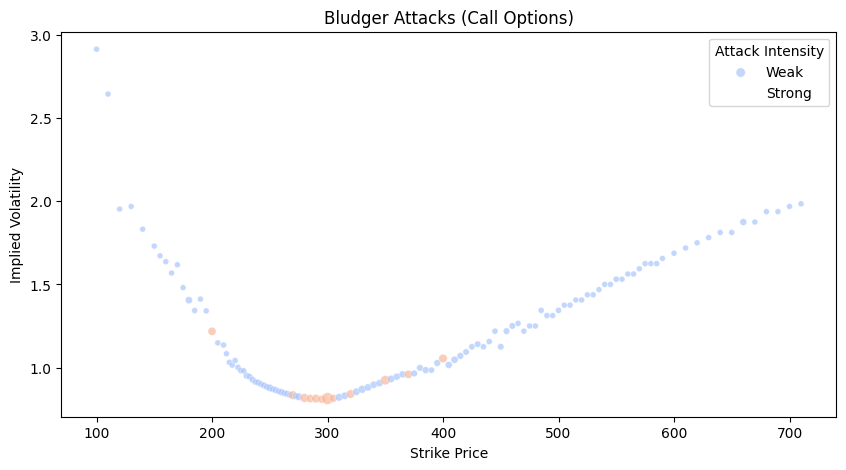

In [ ]:
# User Input
team_name = input("Enter Quidditch Team (Gryffindor/Slytherin/Ravenclaw/Hufflepuff): ")
stock_symbol = teams.get(team_name, "TSLA")  # Default to TSLA if invalid 

In [ ]:
# Fetch Stock Data
stock = yf.Ticker(stock_symbol)


In [ ]:
# Display Available Expiration Dates
expirations = stock.options
print("\nAvailable Expiration Dates:", expirations)

In [ ]:

# User selects expiration date
exp_date = input("Enter Expiration Date (from the list above): ")

In [ ]:
# Fetch Option Chain Data
option_chain = stock.option_chain(exp_date)
calls = option_chain.calls
puts = option_chain.puts

In [ ]:

# Convert 'impliedVolatility' column to numeric (handle missing values)
calls["impliedVolatility"] = calls["impliedVolatility"].fillna(0).astype(float)
puts["impliedVolatility"] = puts["impliedVolatility"].fillna(0).astype(float)

In [ ]:
# Select Features & Target for ML Model (Predicting Call Prices)
X_calls = calls[['strike', 'impliedVolatility']]
y_calls = calls['lastPrice']

X_puts = puts[['strike', 'impliedVolatility']]
y_puts = puts['lastPrice']


In [ ]:
# Train ML Model for Calls
X_train, X_test, y_train, y_test = train_test_split(X_calls, y_calls, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

call_model = LinearRegression()
call_model.fit(X_train_scaled, y_train)
call_predictions = call_model.predict(scaler.transform(X_calls))

In [ ]:
# Train ML Model for Puts
X_train, X_test, y_train, y_test = train_test_split(X_puts, y_puts, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

put_model = LinearRegression()
put_model.fit(X_train_scaled, y_train)
put_predictions = put_model.predict(scaler.transform(X_puts))

In [ ]:
# Add Predictions to DataFrame
calls['PredictedPrice'] = call_predictions
puts['PredictedPrice'] = put_predictions

In [ ]:
# Visualization: Bludger Attack (Option Chain Prediction)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=calls["strike"], y=calls["PredictedPrice"], color="blue", label="Predicted Call Price (Bludger Attack ⚡)")
sns.scatterplot(x=puts["strike"], y=puts["PredictedPrice"], color="red", label="Predicted Put Price (Defensive Spell 🛡️)")
plt.xlabel("Strike Price")
plt.ylabel("Predicted Option Price")
plt.title(f"Bludger Attack (Option Chain Prediction) for {team_name} - {stock_symbol}")
plt.legend()
plt.show()

In [ ]:
#  Trade Strategy Suggestion
iv_threshold = calls["impliedVolatility"].mean()
if iv_threshold < 0.3:
    strategy = "Safe Trade (Defensive Strategy)"
elif iv_threshold < 0.6:
    strategy = "Balanced Trade (Moderate Risk)"
else:
    strategy = "High-Risk Trade (Aggressive Strategy)"

print(f"\n Suggested Trading Strategy: {strategy}")